<a href="https://colab.research.google.com/github/aitanax/p1_aa/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análisis Explorativo de Datos**
Para esta sección, leeremos los datos de nuestro grupo. El grupo 97

------------------------------------------------------------------------------------------------
Imports importantes:

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



------------------------------------------------------------------------------------------------
Carga de datos:

In [203]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip", sep=",")

------------------------------------------------------------------------------------------------
Muestra de todos los datos proporcionados:

In [204]:
wind_ava.head()

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


------------------------------------------------------------------------------------------------
Seleccionar solo la localización de Sotavento:

In [205]:
sotavento_columns = [col for col in wind_ava.columns if ".13" in col]
sotavento_columns.insert(0, "energy")
sotavento_columns.insert(0, "datetime")
wind_ava_sotavento = wind_ava[sotavento_columns]

Muestra de datos filtrados:

In [206]:
wind_ava_sotavento.head()

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


Se han descartado las columnas que no contenían información relevante para nuestro modelo. 
Dado que se nos pide analizar únicamente la ubicación de Sotavento, nos hemos centrado en estas columnas, reduciendo así el conjunto de datos de 552 a 24 columnas. 
Además, hemos considerado importantes las columnas *"energy"* y *"datetime"*, las cuales serán fundamentales para realizar predicciones en nuestro modelo.

In [207]:
wind_ava_sotavento = wind_ava_sotavento.rename(columns = {
    "energy": "Energy", 
    "datetime": "Datetime", 
    "p54.162.13": "Vertical integral of temperature", 
    "p55.162.13": "Vertical integral of water vapour", 
    "cape.13": "Convective available potential energy", 
    "p59.162.13": "Vertical integral of divergence of kinetic energy", 
    "lai_lv.13": "Leaf area index, low vegetation", 
    "lai_hv.13": "Leaf area index, high vegetation", 
    "u10n.13": "Neutral wind at 10 m u-component", 
    "v10n.13": "Neutral wind at 10 m v-component", 
    "sp.13": "Surface pressure",
    "stl1.13": "Soil temperature level 1",
    "u10.13": "10 metre U wind component",
    "v10.13": "10 metre V wind component",
    "t2m.13": "2 metre temperature", 
    "stl2.13": "Soil temperature level 2", 
    "stl3.13": "Soil temperature level 3", 
    "iews.13": "Instantaneous eastward turbulent surface stress",
    "inss.13": "Instantaneous northward turbulent surface", 
    "stl4.13": "Soil temperature level 2", 
    "fsr.13": "Forecast surface roughness", 
    "flsr.13": "Forecast logarithm of surface roughness for heat",
    "u100.13": "100 metre U wind component",
    "v100.13": "100 metre V wind component", })
wind_ava_sotavento.head()

,Datetime,Energy,Vertical integral of temperature,Vertical integral of water vapour,Convective available potential energy,Vertical integral of divergence of kinetic energy,"Leaf area index, low vegetation","Leaf area index, high vegetation",Neutral wind at 10 m u-component,Neutral wind at 10 m v-component,...,2 metre temperature,Soil temperature level 2,Soil temperature level 3,Instantaneous eastward turbulent surface stress,Instantaneous northward turbulent surface,Soil temperature level 2,Forecast surface roughness,Forecast logarithm of surface roughness for heat,100 metre U wind component,100 metre V wind component
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


Se han renombrado las columnas para facilitar los posteriores análisis, ya que los nombres originales resultaban confusos. Ahora, los nuevos nombres reflejan de manera más clara la información que contienen cada una de las variables, lo que mejorará la comprensión y la interpretación de los datos.

------------------------------------------------------------------------------------------------
Tipos de datos:

In [208]:
wind_ava_sotavento.dtypes

Datetime                                              object
Energy                                               float64
Vertical integral of temperature                     float64
Vertical integral of water vapour                    float64
Convective available potential energy                float64
Vertical integral of divergence of kinetic energy    float64
Leaf area index, low vegetation                      float64
Leaf area index, high vegetation                     float64
Neutral wind at 10 m u-component                     float64
Neutral wind at 10 m v-component                     float64
Surface pressure                                     float64
Soil temperature level 1                             float64
10 metre U wind component                            float64
10 metre V wind component                            float64
2 metre temperature                                  float64
Soil temperature level 2                             float64
Soil temperature level 3

Se comprueban los tipos de datos en el conjunto para asegurar la coherencia y consistencia en el análisis. En caso de encontrar tipos de datos diferentes, o datos en formato cadena de carácteres, se realizarán las conversiones necesarias para garantizar la uniformidad y la correcta manipulación de los datos en futuros procesos analíticos.

In [209]:
wind_ava_sotavento["Datetime"] = pd.to_datetime(wind_ava_sotavento["Datetime"])
wind_ava_sotavento.dtypes

Datetime                                             datetime64[ns]
Energy                                                      float64
Vertical integral of temperature                            float64
Vertical integral of water vapour                           float64
Convective available potential energy                       float64
Vertical integral of divergence of kinetic energy           float64
Leaf area index, low vegetation                             float64
Leaf area index, high vegetation                            float64
Neutral wind at 10 m u-component                            float64
Neutral wind at 10 m v-component                            float64
Surface pressure                                            float64
Soil temperature level 1                                    float64
10 metre U wind component                                   float64
10 metre V wind component                                   float64
2 metre temperature                             

Se ha convertido el tipo de datos de la columna "Datetime" de object a datetime. Después de la conversión, ya se pueden realizar operaciones de fecha y tiempo sobre esta columna, puesto que está en el formato adecuado.

------------------------------------------------------------------------------------------------
Forma del conjunto de datos:

In [210]:
wind_ava_sotavento.shape

(4748, 24)

In [211]:
duplicate_rows = wind_ava_sotavento[wind_ava_sotavento.duplicated()]
print("Número de filas duplicadas: ", duplicate_rows.shape)

Número de filas duplicadas:  (0, 24)


In [212]:
null_rows = wind_ava_sotavento[wind_ava_sotavento.isnull().any(axis=1)]
print("Número de filas nulas: ", null_rows.shape)

Número de filas nulas:  (0, 24)


Diagrama de caja:

<Axes: xlabel='Energy'>

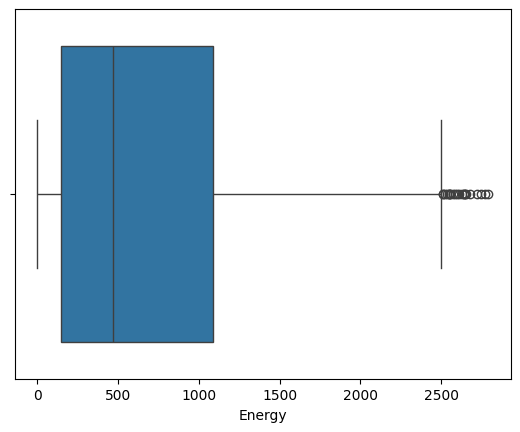

In [213]:
sns.boxplot(x=wind_ava_sotavento["Energy"])